In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gzip

# Set plot style to 'ggplot' (a valid Matplotlib style)
plt.style.use('ggplot')

# Load ER status labels from TSV file (1=ER+, 0=ER-)
er_status_labels = pd.read_csv("data/class.tsv", header=None, names=["ERStatus"])["ERStatus"]

# Load gene metadata from gzipped TSV file
gene_info = pd.read_csv("data/columns.tsv.gz", sep="\t", comment="#")

# Extract IDs for genes of interest (XBP1 and GATA3)
selected_gene_ids = gene_info.set_index("GeneSymbol").loc[["XBP1", "GATA3"]]["ID"].astype(str).tolist()

In [9]:
# Load gene expression data from gzipped TSV file
with gzip.open("data/filtered.tsv.gz", "rt") as expr_file:
    expression_data = pd.read_csv(expr_file, sep="\t")

expression_data.columns = expression_data.columns.str.strip()

selected_gene_expr = expression_data[selected_gene_ids].copy()
selected_gene_expr.columns = ["XBP1", "GATA3"]


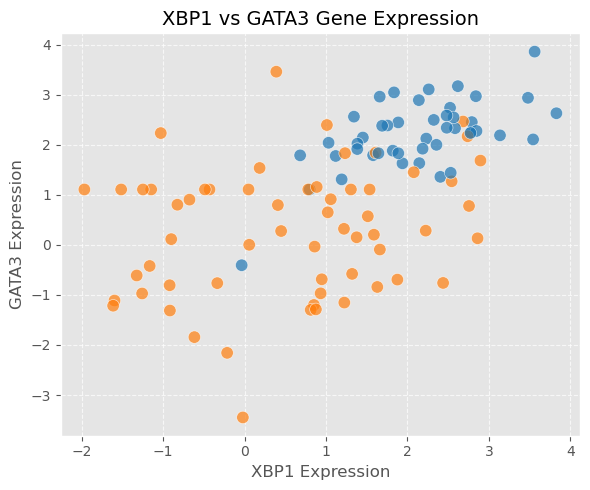

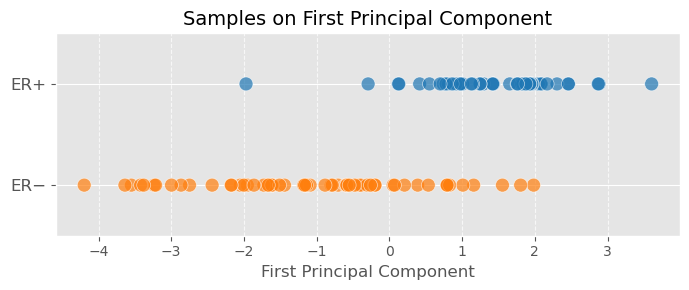

In [10]:
# Create scatter plot for gene expression
plt.figure(figsize=(6, 5))
colors = er_status_labels.map({1: "#1f77b4", 0: "#ff7f0e"})  # Blue for ER+, Orange for ER-
plt.scatter(selected_gene_expr["XBP1"], selected_gene_expr["GATA3"], 
           c=colors, alpha=0.7, s=80, edgecolors='white')
plt.xlabel("XBP1 Expression", fontsize=12)
plt.ylabel("GATA3 Expression", fontsize=12)
plt.title("XBP1 vs GATA3 Gene Expression", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Perform PCA with 1 component
pca = PCA(n_components=1)
first_pc = pca.fit_transform(selected_gene_expr)

er_status_array = er_status_labels.values

# Create scatter plot for PCA results
plt.figure(figsize=(7, 3))
plt.scatter(first_pc, er_status_array, 
           c=colors, alpha=0.7, s=100, edgecolors='white')
plt.yticks([0, 1], ["ER−", "ER+"], fontsize=12)
plt.ylim(-0.5, 1.5)
plt.xlabel("First Principal Component", fontsize=12)
plt.title("Samples on First Principal Component", fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()